This notebook explores the Austin's lobbyist registration dataset, after the city's 2017 expansion of the range of lobbyist data it publishes and changes to the format of the data tables.

In [1]:
import pandas as pd

df = pd.read_csv("../data/Lobbyist_-_Clients.csv")

In [2]:
df = df.sort_values("CLIENT_LAST_NAME")

In [3]:
date = pd.read_csv("../data/Lobbyist_-_Reports.csv")

In [4]:
dates = pd.merge(df, date[["REPORT_ID","REPORT_DATE"]], how='left', on="REPORT_ID")

In [5]:
dates

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID,REPORT_DATE
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017
1,C0040,R20171031124151,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20171031124151-C0040,10/16/2017
2,C0036,R20171130160530,RG0132,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171130160530-C0036,11/20/2017
3,C0036,R20180221105850,RG0142,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20180221105850-C0036,02/20/2018
4,C0036,R20171122113731,RG0018,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122113731-C0036,11/07/2017
5,C0036,R20171115161738,RG0070,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115161738-C0036,11/07/2017
6,C0036,R20171115142049,RG0065,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171115142049-C0036,11/07/2017
7,C0036,R20171113152000,RG0061,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171113152000-C0036,11/07/2017
8,C0036,R20171122114728,RG0057,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122114728-C0036,11/07/2017
9,C0041,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"2208 Lake Austin, LLC",NaN,2208 Lake Austin Blvd.,NaN,Austin,TX,78703,Property Owner,NaN,NaN,NaN,R20170901095457-C0041,08/30/2017


In [6]:
mq = pd.read_csv("../data/Lobbyist_-_Municipal_Questions.csv")

In [7]:
mq

,REPORT_ID,MQ_ID,REGISTRANT_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID
0,R20170703170748,Q0001,RG0017,"Wage, health, and safety standards for Austin'...",N,NaN,R20170703170748-Q0001
1,R20170703190233,Q0001,RG0097,"Convention & Tourism Issues (Promotion, Sales ...",N,NaN,R20170703190233-Q0001
2,R20170718142458,Q0006,RG0101,Traffic Impact Analysis,Y,NaN,R20170718142458-Q0006
3,R20170718150200,Q0001,RG0039,"Lobbying on behalf of Argyle Residential, LLC ...",Y,NaN,R20170718150200-Q0001
4,R20170731114209,Q0019,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0019
5,R20170731114209,Q0020,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0020
6,R20170731114209,Q0023,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0023
7,R20170731114209,Q0024,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0024
8,R20170731114209,Q0021,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0021
9,R20170731114209,Q0025,RG0061,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20170731114209-Q0025


In [8]:
# Linking the clients to the questions they lobbied on

dq = pd.merge(dates, mq, how='left', on=["REPORT_ID","REGISTRANT_ID"])

In [9]:
pd.options.display.max_colwidth = 500
dq

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0045,"Lobbying on behalf of Atlantic Pacific Communities, LLC regarding various land development issues.",N,NaN,R20170901095457-Q0045
1,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0064,"Lobbying on behalf of LDG Norwood, L.P. regarding various zoning issues.",N,NaN,R20170901095457-Q0064
2,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0065,Lobbying on behalf of Andra Liemandt regarding various zoning issues.,N,NaN,R20170901095457-Q0065
3,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0066,Lobbying on behalf of Joseph Liemandt regarding various zoning issues.,N,NaN,R20170901095457-Q0066
4,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0067,"Lobbying on behalf of Mariposa Real Estate, LLC regarding various zoning issues.",N,NaN,R20170901095457-Q0067
5,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0059,Lobbying on behalf of Anthony George regarding various permit issues.,N,NaN,R20170901095457-Q0059
6,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0068,"Lobbying on behalf of McAdams Enterprises, LLC regarding various zoning issues.",N,NaN,R20170901095457-Q0068
7,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0069,Lobbying on behalf of Mill Creek Residential Trust regarding various land development issues.,N,NaN,R20170901095457-Q0069
8,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0070,Lobbying on behalf of Lampros Moumouris regarding various permit/zoning issues.,N,NaN,R20170901095457-Q0070
9,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0071,Lobbying on behalf of The NRP Group regarding various zoning issues.,N,NaN,R20170901095457-Q0071


In [10]:
# Adding new column for a beneficiary of lobbying who isn't the client of the lobbyist

dq["BENEFICIARY"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (.+) regarding (?:.+)', expand=False)

# Shortening some answers from the form

dq["TOPIC"] = dq["MQ_DESC"].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)(?: issues.)', expand=False)
dq["TOPIC"] = dq["TOPIC"].fillna(dq['MQ_DESC'].str.extract('Lobbying on behalf of (?:.+) regarding (?:various )?(.+)', expand=False))
dq["TOPIC"] = dq['TOPIC'].fillna(dq['MQ_DESC']).str.strip(".")
dq['MQ_DESC'] = dq['TOPIC']
dq = dq.drop(columns=['TOPIC'])

In [11]:
dq

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY
0,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0045,land development,N,NaN,R20170901095457-Q0045,"Atlantic Pacific Communities, LLC"
1,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0064,zoning,N,NaN,R20170901095457-Q0064,"LDG Norwood, L.P."
2,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0065,zoning,N,NaN,R20170901095457-Q0065,Andra Liemandt
3,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0066,zoning,N,NaN,R20170901095457-Q0066,Joseph Liemandt
4,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0067,zoning,N,NaN,R20170901095457-Q0067,"Mariposa Real Estate, LLC"
5,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0059,permit,N,NaN,R20170901095457-Q0059,Anthony George
6,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0068,zoning,N,NaN,R20170901095457-Q0068,"McAdams Enterprises, LLC"
7,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0069,land development,N,NaN,R20170901095457-Q0069,Mill Creek Residential Trust
8,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0070,permit/zoning,N,NaN,R20170901095457-Q0070,Lampros Moumouris
9,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",...,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0071,zoning,N,NaN,R20170901095457-Q0071,The NRP Group


## Which clients hired the most lobbyists to work on the most issues?

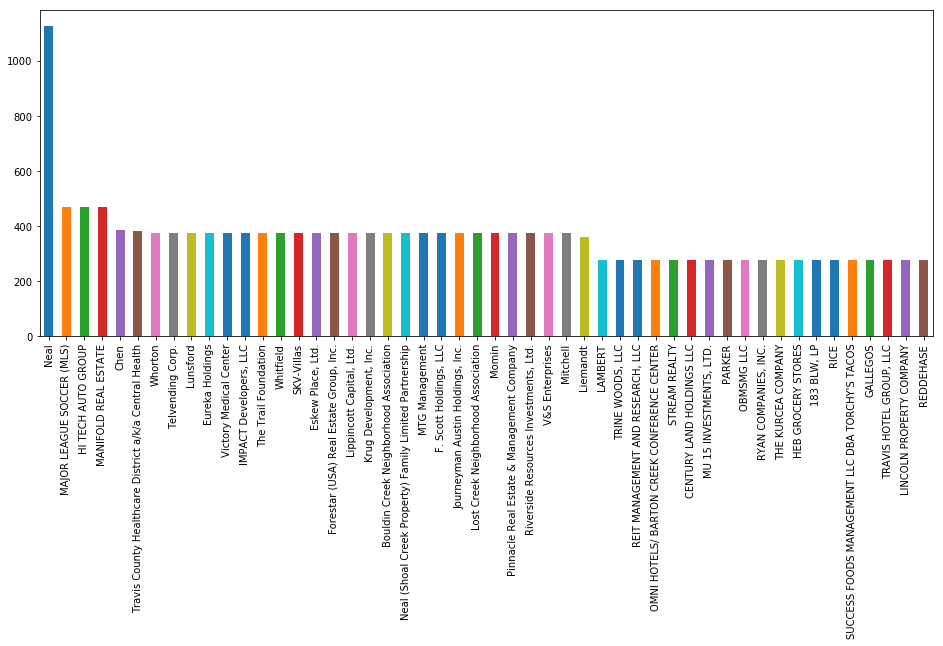

In [12]:
%matplotlib inline
plotDF = dq["CLIENT_LAST_NAME"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

## Who, other than direct clients, had the most lobbying done on their behalf?

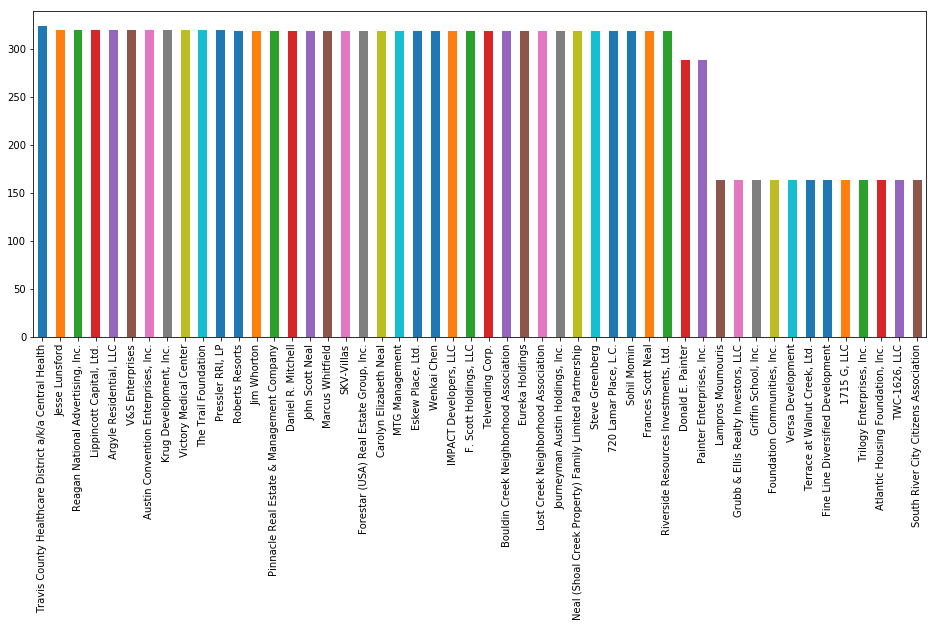

In [13]:
plotDF = dq["BENEFICIARY"].value_counts()[:50].plot(kind='bar', figsize=(16,6))

In [33]:
dq["CLIENT_FULL_NAME"] = dq[['CLIENT_FIRST_NAME', 'CLIENT_LAST_NAME']][dq.CLIENT_FIRST_NAME.notna()]\
    .apply(lambda x: ' '.join(x), axis=1).apply(lambda x: x.strip())
dq["CLIENT_FULL_NAME"][dq.CLIENT_FULL_NAME.isna()] = dq["CLIENT_LAST_NAME"]

/Users/Matt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
dq.CLIENT_FULL_NAME.value_counts()

MAJOR LEAGUE SOCCER (MLS)                                 470
HI TECH AUTO GROUP                                        470
MANIFOLD REAL ESTATE                                      470
Wenkai Chen                                               387
Travis County Healthcare District a/k/a Central Health    383
Victory Medical Center                                    376
Jim Whorton                                               376
IMPACT Developers, LLC                                    376
Lost Creek Neighborhood Association                       376
Riverside Resources Investments, Ltd.                     376
The Trail Foundation                                      376
Eureka Holdings                                           376
Daniel Mitchell                                           376
Frances Neal                                              376
Pinnacle Real Estate & Management Company                 376
Eskew Place, Ltd.                                         376
Forestar

In [40]:
dq[dq["CLIENT_FULL_NAME"] == "69 Grandview LP"]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,...,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME
953,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0045,land development,N,NaN,R20170901095457-Q0045,"Atlantic Pacific Communities, LLC",69 Grandview LP
954,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0064,zoning,N,NaN,R20170901095457-Q0064,"LDG Norwood, L.P.",69 Grandview LP
955,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0065,zoning,N,NaN,R20170901095457-Q0065,Andra Liemandt,69 Grandview LP
956,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0066,zoning,N,NaN,R20170901095457-Q0066,Joseph Liemandt,69 Grandview LP
957,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0067,zoning,N,NaN,R20170901095457-Q0067,"Mariposa Real Estate, LLC",69 Grandview LP
958,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0059,permit,N,NaN,R20170901095457-Q0059,Anthony George,69 Grandview LP
959,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0068,zoning,N,NaN,R20170901095457-Q0068,"McAdams Enterprises, LLC",69 Grandview LP
960,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0069,land development,N,NaN,R20170901095457-Q0069,Mill Creek Residential Trust,69 Grandview LP
961,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0070,permit/zoning,N,NaN,R20170901095457-Q0070,Lampros Moumouris,69 Grandview LP
962,C0039,R20170901095457,RG0052,Entity,NaN,NaN,NaN,69 Grandview LP,NaN,8300 North FM 620,...,NaN,R20170901095457-C0039,08/30/2017,Q0071,zoning,N,NaN,R20170901095457-Q0071,The NRP Group,69 Grandview LP


In [45]:
dq.groupby("CLIENT_FULL_NAME").MQ_DESC.value_counts()

CLIENT_FULL_NAME                       MQ_DESC                                                                                      
1715 G, LLC                            zoning                                                                                           62
                                       land development                                                                                 40
                                       land development/zoning                                                                          17
                                       rezoning of three parcels of land                                                                 6
                                       procurement                                                                                       4
                                       site development                                                                                  4
                                 

In [38]:
dq[["CLIENT_FULL_NAME", "BENEFICIARY"]].apply(pd.Series.value_counts)

,CLIENT_FULL_NAME,BENEFICIARY
"1715 G, LLC",180.0,164.0
"183 BLW, LP",275.0,NaN
"2208 Lake Austin, LLC",180.0,164.0
"2222 CAP. TEXAS, LLC",41.0,NaN
"2501 W. BRAKER, L.P.",275.0,NaN
"6400 Riverside, LLC",2.0,NaN
69 Grandview LP,180.0,164.0
706 Development Corporation,5.0,NaN
"720 Lamar Place, L.C.",254.0,319.0
AECOM,180.0,164.0


In [15]:
dq["BENEFICIARY"].value_counts()[:50]

Travis County Healthcare District a/k/a Central Health    324
Jesse Lunsford                                            320
Reagan National Advertising, Inc.                         320
Lippincott Capital, Ltd.                                  320
Argyle Residential, LLC                                   320
V&S Enterprises                                           320
Austin Convention Enterprises, Inc.                       320
Krug Development, Inc.                                    320
Victory Medical Center                                    320
The Trail Foundation                                      320
Pressler RRI, LP                                          320
Roberts Resorts                                           319
Jim Whorton                                               319
Pinnacle Real Estate & Management Company                 319
Daniel R. Mitchell                                        319
John Scott Neal                                           319
Marcus W

In [46]:
# These data tables link preset categories to the subject matter of the lobbying.
# How should that be integrated into a visualization?

kvp = pd.read_csv("../data/Lobbyist_-_Municipal_Question_Subject_Matter_Key-Value_Pairs.csv")
sm = pd.read_csv("../data/Lobbyist_-_Subject_Matter_List.csv")

In [85]:
dq[dq["MQ_ID"]=="Q0001"][:5]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME
27,C0040,R20170901095457,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20170901095457-C0040,08/30/2017,Q0001,land development,N,NaN,R20170901095457-Q0001,"720 Lamar Place, L.C.","1715 G, LLC"
92,C0040,R20171031124151,RG0052,Entity,NaN,NaN,NaN,"1715 G, LLC",NaN,"755 Grand Blvd., B-105",Suite 236,Miramar Beach,FL,32550,Property Owner,NaN,NaN,NaN,R20171031124151-C0040,10/16/2017,Q0001,land development,N,NaN,R20171031124151-Q0001,"720 Lamar Place, L.C.","1715 G, LLC"
183,C0036,R20171130160530,RG0132,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171130160530-C0036,11/20/2017,Q0001,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20171130160530-Q0001,NaN,"183 BLW, LP"
223,C0036,R20180221105850,RG0142,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20180221105850-C0036,02/20/2018,Q0001,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20180221105850-Q0001,NaN,"183 BLW, LP"
262,C0036,R20171122113731,RG0018,Entity,NaN,NaN,NaN,"183 BLW, LP",NaN,PO BOX 9190,NaN,AUSTIN,TX,78766,REAL ESTATE INVESTMENT/ DEVELOPMENT,NaN,NaN,NaN,R20171122113731-C0036,11/07/2017,Q0001,ENTITLEMENTS RELATED TO LAND DEVELOPMENT,Y,NaN,R20171122113731-Q0001,NaN,"183 BLW, LP"


In [51]:
sm[:5]

,SM_ID,SM_CATEGORY_DESC,ACTIVE
0,SM_140,Real Estate,Y
1,SM_142,"Rules, Proposed Rules, or Rule Making",Y
2,SM_145,Taxation or Fees,Y
3,SM_15,Annexation,Y
4,SM_150,Technology or Communications,Y


In [55]:
wide = pd.concat([dq,pd.DataFrame(columns=sm["SM_CATEGORY_DESC"].unique())])

In [56]:
wide[:5]

,Accessibility or Persons with Disabilities,Affordability,Animals,Annexation,"Arts, Music, Film, Cultural or Creative Industries",Aviation,BENEFICIARY,BUSINESS_DESC,CLIENTENTITY_CD,CLIENT_ADR1,...,RP_YN,Real Estate,Row_ID_x,Row_ID_y,"Rules, Proposed Rules, or Rule Making",SM_OTHER_DESC,Taxation or Fees,Technology or Communications,Transportation or Mobility,Zoning or Platting
0,NaN,NaN,NaN,NaN,NaN,NaN,"Atlantic Pacific Communities, LLC",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0045,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"LDG Norwood, L.P.",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0064,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Andra Liemandt,Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0065,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Liemandt,Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0066,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"Mariposa Real Estate, LLC",Property Owner,Entity,"755 Grand Blvd., B-105",...,N,NaN,R20170901095457-C0040,R20170901095457-Q0067,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
kvp[:5]

,MQ_ID,REPORT_ID,SM_ID,Row_ID
0,Q0001,R20170707171903,SM_142,R20170707171903-Q0001-SM_142
1,Q0001,R20170707171903,SM_145,R20170707171903-Q0001-SM_145
2,Q0001,R20170707171903,SM_150,R20170707171903-Q0001-SM_150
3,Q0001,R20170707171903,SM_155,R20170707171903-Q0001-SM_155
4,Q0001,R20170707171903,SM_160,R20170707171903-Q0001-SM_160


In [60]:
kwide= pd.merge(kvp, sm[["SM_ID", "SM_CATEGORY_DESC"]], on="SM_ID", how='left')

In [63]:
kwide[:5]

,MQ_ID,REPORT_ID,SM_ID,Row_ID,SM_CATEGORY_DESC
0,Q0001,R20170707171903,SM_142,R20170707171903-Q0001-SM_142,"Rules, Proposed Rules, or Rule Making"
1,Q0001,R20170707171903,SM_145,R20170707171903-Q0001-SM_145,Taxation or Fees
2,Q0001,R20170707171903,SM_150,R20170707171903-Q0001-SM_150,Technology or Communications
3,Q0001,R20170707171903,SM_155,R20170707171903-Q0001-SM_155,Transportation or Mobility
4,Q0001,R20170707171903,SM_160,R20170707171903-Q0001-SM_160,Zoning or Platting


In [74]:
kwide = kwide[["REPORT_ID","MQ_ID","SM_CATEGORY_DESC"]]

In [75]:
import numpy as np
table = pd.pivot_table(kwide, index=['REPORT_ID', 'MQ_ID'], columns=['SM_CATEGORY_DESC'], aggfunc=lambda x: True)

In [84]:
table[:5]

SM_CATEGORY_DESC      Accessibility or Persons with Disabilities  \
REPORT_ID       MQ_ID                                              
R20170619135121 Q0001                                       None   
                Q0002                                       True   
R20170619135517 Q0001                                       None   
R20170620093457 Q0001                                       None   
R20170626125707 Q0001                                       None   

SM_CATEGORY_DESC      Affordability Animals Annexation  \
REPORT_ID       MQ_ID                                    
R20170619135121 Q0001          True    None       None   
                Q0002          True    None       True   
R20170619135517 Q0001          None    None       None   
R20170620093457 Q0001          None    None       None   
R20170626125707 Q0001          None    None       None   

SM_CATEGORY_DESC      Arts, Music, Film, Cultural or
 Creative Industries  \
REPORT_ID       MQ_ID                                                       
R20170619135121 Q0001                                                None   
                Q0002                                                None   
R20170619135517 Q0001                                                None   
R20170620093457 Q0001                                                None   
R20170626125707 Q0001                                                None   

SM_CATEGORY_DESC      Aviation City Infrastructure or Public Works  \
REPORT_ID       MQ_ID                                                
R20170619135121 Q0001     None                                True   
                Q0002     None                                True   
R20170619135517 Q0001     None                                None   
R20170620093457 Q0001     None                                None   
R20170626125707 Q0001     None                                None   

SM_CATEGORY_DESC      Civil Service, Municipal Employment, or Retirement Systems  \
REPORT_ID       MQ_ID                                                              
R20170619135121 Q0001                                                       None   
                Q0002                                                       None   
R20170619135517 Q0001                                                       None   
R20170620093457 Q0001                                                       None   
R20170626125707 Q0001                                                       True   

SM_CATEGORY_DESC      Code Compliance Construction Contracts, Procurement  \
REPORT_ID       MQ_ID                                                       
R20170619135121 Q0001            True         True                   None   
                Q0002            True         True                   True   
R20170619135517 Q0001            None         None                   None   
R20170620093457 Q0001            None         None                   None   
R20170626125707 Q0001            None         None                   None   

SM_CATEGORY_DESC      Diversity, Equity, or Inclusion Economic Development  \
REPORT_ID       MQ_ID                                                        
R20170619135121 Q0001                            None                 None   
                Q0002                            True                 True   
R20170619135517 Q0001                            None                 None   
R20170620093457 Q0001                            None                 None   
R20170626125707 Q0001                            None                 None   

SM_CATEGORY_DESC      Environmental Matters, Air or Water Quality, or Watershed Protection  \
REPORT_ID       MQ_ID                                                                        
R20170619135121 Q0001                                                                 None   
                Q0002                                                                 None   
R20170619135517 Q0001            

In [78]:
lobby_topics = pd.merge(dq,table, left_on=["REPORT_ID","MQ_ID"], right_index=True,how='left', sort=True)

In [81]:
pd.options.display.max_columns = 999
lobby_topics[:5]

,CLIENT_ID,REPORT_ID,REGISTRANT_ID,CLIENTENTITY_CD,CLIENT_TITLE,CLIENT_FIRST_NAME,CLIENT_MI,CLIENT_LAST_NAME,CLIENT_SUFFIX,CLIENT_ADR1,CLIENT_ADR2,CLIENT_CITY,CLIENT_STATE,CLIENT_ZIP,BUSINESS_DESC,COMP_CATEGORY,COMP_EXACT_AMOUNT,COMP_COMMENT,Row_ID_x,REPORT_DATE,MQ_ID,MQ_DESC,RP_YN,SM_OTHER_DESC,Row_ID_y,BENEFICIARY,CLIENT_FULL_NAME,Accessibility or Persons with Disabilities,Affordability,Animals,Annexation,"Arts, Music, Film, Cultural or Creative Industries",Aviation,City Infrastructure or Public Works,"Civil Service, Municipal Employment, or Retirement Systems",Code Compliance,Construction,"Contracts, Procurement","Diversity, Equity, or Inclusion",Economic Development,"Environmental Matters, Air or Water Quality, or Watershed Protection","Finance, Budget, or Investments","Health, Healthcare, Mental Health, or Human Services",Historic Preservation,"Hospitality, Tourism, Events, or Convention Center",Human Rights or Immigration,Labor or Workforce,Land Development or Land Use,Municipal Court,Municipal Legislation,Neighborhoods,"Parks, Recreation, Libraries, or Museums","Permits (Building, Site Plans)",Permits (Other),"Public Safety, Policy, Fire, EMS, or Emergency Planning and Response","Public Utilities, Energy, Water, Solid Waste, or Recycling",Quality of Life Affairs,Real Estate,"Rules, Proposed Rules, or Rule Making",Taxation or Fees,Technology or Communications,Transportation or Mobility,Zoning or Platting
30248,C0001,R20170620093457,RG0091,Entity,NaN,NaN,NaN,"Parkgreen Living, LLC",NaN,800 Gessner,Suite 350,Houston,TX,77024,Land development,NaN,NaN,NaN,R20170620093457-C0001,06/19/2017,Q0001,C14H-2017-00031,Y,NaN,R20170620093457-Q0001,NaN,"Parkgreen Living, LLC",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,None,None,None,None,None,True,None,None,None,None,True
3679,C0001,R20170710102326,RG0085,Entity,NaN,NaN,NaN,"Allen Harrison Development, LLC",NaN,1800 Augusta,150,Houston,TX,77056,Real Estate Development,NaN,NaN,Disclosure of client compensation is not provided because such disclosure would violate applicable state law in Texas Disciplinary Rule 1.05 and Chapter 81 of the Texas Government Code.,R20170710102326-C0001,07/07/2017,Q0001,Entitlements related to site plan approval and permitting related to demolition and Historic review,Y,NaN,R20170710102326-Q0001,NaN,"Allen Harrison Development, LLC",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,True,True,None,None,None,None,None,None,None,None,None
8352,C0002,R20170710102326,RG0085,Individual,NaN,Daniel,NaN,Carl,NaN,4021 Valley View Road,B,Austin,TX,78704,Real Estate Development,NaN,NaN,Disclosure of client compensation is not provided because such disclosure would violate applicable state law in Texas Disciplinary Rule 1.05 and Chapter 81 of the Texas Government Code.,R20170710102326-C0002,07/07/2017,Q0001,Entitlements related to site plan approval and permitting related to demolition and Historic review,Y,NaN,R20170710102326-Q0001,NaN,Daniel Carl,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,True,True,None,None,None,None,None,None,None,None,None
9079,C0003,R20170710102326,RG0085,Entity,NaN,NaN,NaN,Cielo Property Group,NaN,823 Congress Avenue,Suite 600,Austin,TX,78701,Real Estate Development,NaN,NaN,Disclosure of client compensation is not provided because such disclosure would violate applicable state law in Texas Disciplinary Rule 1.05 and Chapter 81 of the Texas Government Code.,R20170710102326-C0003,07/07/2017,Q0001,Entitlements related to site plan approval and permitting related to demolition and Historic review,Y,NaN,R20170710102326-Q0001,NaN,Cielo Property Group,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,True,None,None,None,None,True,True,None,None,None,None,None,None,None,Non

In [82]:
lobby_topics = lobby_topics.drop(['COMP_COMMENT', 'Row_ID_x', 'Row_ID_y'], axis=1)

In [83]:
lobby_topics.to_csv("../processed/lobby_topics.csv")

In [ ]:
# Joining the datasets into a single table this way causes the number of rows to explode.
# It might be better to do a separate lookup to access the SM_ID column.

dqsm = pd.merge(dq, kvp[["MQ_ID","REPORT_ID","SM_ID"]], how='left', on=["MQ_ID","REPORT_ID"])

In [ ]:
dqsm

In [ ]:
dqsml = pd.merge(dqsm, sm[["SM_ID","SM_CATEGORY_DESC"]], how='left', on="SM_ID")

In [ ]:
dqsml[:5]

In [ ]:
# This will use the registrant's free text to fill the "Subject Matter" column when none of the pre-defined
# categories was selected.

dqsml["SM_CATEGORY_DESC"] = dqsml["SM_CATEGORY_DESC"].fillna(value=dqsml["SM_OTHER_DESC"])

In [ ]:

dqsml = dqsml.drop(columns=['Row_ID_x', 'Row_ID_y', 'SM_ID'])

In [ ]:
dqsml

In [ ]:
dqsm[dqsm["REPORT_ID"] == "R20170710112719"]

In [ ]:
dx = dqsml.groupby(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])['SM_CATEGORY_DESC'].agg(lambda x: set(x))

In [ ]:
# nan values correspond to the ID "SM_Other".

dx[:10]

In [ ]:
dqsml[dqsml["REPORT_ID"]=="R20170710112719"]

In [ ]:
df = dqsml.set_index(['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [ ]:
df["SM_CATEGORY_DESC"] = dx

In [ ]:
df = df.reset_index().drop_duplicates(subset=['REPORT_ID', 'REGISTRANT_ID','CLIENT_ID'])

In [ ]:
df["CLIENT_LAST_NAME"].nunique()